In [ ]:
# MIT License
#
#@title Copyright (c) 2023 CCAI Community Authors { display-mode: "form" }
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# CCAI Tutorial on flood monitoring Part I: People
Authors:
*   Casper Fibaek, [ESA Φ-lab](https://philab.esa.int/), Casper.Fibaek@esa.int
*   Andreas Luyts, [ESA Φ-lab](https://philab.esa.int/), Andreas.Luyts@ext.esa.int


**Prerequisites**:
1.   Basic understanding of Deep Learning and Remote Sensing.
2.   Familiarity with Python and geospatial data processing.

**Software requirements**:

We are going to use Google Colab. Some cloud storage is necessary to load the imagery.

**Goals**

* The purpose of this tutorial is to give an introduction to the use of Convolutional Neural Networks and Satellite Images for the climate science.
* The data will not be polished RGB data, which is often what is used in AI tutorials, but satellite data that comes with higher dimensions and modalities. The tutorial will introduce these datasets and showcase how they can be used to map structures and surface water in a simple way.

# Table of Contents


*   [Overview](#overview)
*   [Climate Impact](#climate-impact)
*   [Target Audience](#target-audience)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Data Description](#data-description)
*   [Methodology](#methodology)
*   [Results & Discussion](#results-and-discussion)
*   [References](#references)


<a name="overview"></a>
# Overview

Welcome to this tutorial on flood monitoring and management using Earth Observation and Artificial Intelligence, focusing on the Mediterranean region of Egypt. Floods in coastal areas can be extremely destructive natural hazards resulting in societal and economical damage. In recent years, Earth Observation data, particularly from the Copernicus Programme, has proven invaluable for taking appropriate measures before, during and after flooding events, as it provides a wealth of information on various aspects such as inundated areas, land use, elevation profile and population density. By integrating Artificial Intelligence techniques, we can further enhance the analysis and decision-making processes necessary to prevent or minimise loss in flooding events.

In this tutorial, we will delve into the various methodologies, tools, and applications of Earth Observation data from the Copernicus Programme, with a focus on the Sentinel satellites, for assessing and managing flooding events in Mediterranean Egypt. We will explore how Artificial Intelligence can be harnessed to process and analyze these vast datasets, extracting valuable insights and automating complex tasks. Through hands-on examples and case studies, you will learn how to apply these techniques to real-world scenarios, enabling you to contribute to the ongoing efforts in battling these extreme events.

The topics of floods prediction, monitoring and disaster management are vast. As is the use of Earth Observation for these tasks. This tutorial aims to serve as a starting point and inspiration for further studies.


<a name="climate-impact"></a>
# Climate Impact
Flooding is one of the most destructive natural hazards on the Earth that creates major economic and societal harm by damaging homes, disrupting critical infrastructure and degrading farmlands according to the [report published by United Nations Office for Disaster Risk Reduction](https://www.undrr.org/publication/human-cost-disasters-overview-last-20-years-2000-2019).
<br><br>
It can be challenging to connect floods to climate change due to the complex interplay of numerous factors, including both natural weather conditions and human actions. Additionally, historical data on floods is limited, making it difficult to compare past occurrences to current trends. However, as the IPCC (Intergovernmental Panel on Climate Change) noted in its [special report on extremes](https://www.ipcc.ch/site/assets/uploads/2018/03/SREX-Chap3_FINAL-1.pdf), there is clear indication that climate change has influenced several water-related variables, such as rainfall and snowmelt, that contribute to floods. While climate change may not directly cause floods, it does exacerbate many of the underlying factors. Global warming will keep increasing also river flood risk in the future resulting in more damage every year according to the [JRC](https://joint-research-centre.ec.europa.eu/system/files/2020-09/05_pesetaiv_river_floods_sc_august2020_en.pdf).
<br><br>

**Alexandria and climate risks** <br>
> Alexandria, located on the Mediterranean coast, is the second-largest city in Egypt and has a population of approximately 5.5 million. Alexandria and the Nile Delta are among the most vulnerable areas in the world to climate change. The UN’s Intergovernmental Panel on Climate Change predicts that global sea levels could rise by as much as 68cm by 2050, flooding parts of Alexandria and causing saltwater intrusion into the groundwater. It would also cause buildings to collapse and salination of farmland in the nearby Nile Delta region destroying livelihoods and triggering internal displacement. Reports suggest that even 50cm of sea-level rise would threaten 2 million people
in Alexandria, including Al Max. Increased temperatures driven by climate change are already affecting biodiversity in the Mediterranean Sea.

Continue reading about Alexandria and climate risks in the [Climate and mobility case study January 2023: Alexandria, Egypt: Al Max](https://reliefweb.int/report/egypt/climate-and-mobility-case-study-january-2023-alexandria-egypt-al-max).
<br>

For these reasons adequate flood risk assessment tools are essential to mitigate damage and save lives. Comprehensive flood risk assessments do not only take the chance of flooding into account but also the possible damages to land and the vulnerability of the people living there. It involves an analysis of which interventions would be most successful in reducing overall harm.
<br>

Satellite imagery and the methods to process them are invaluable tools in the ongoing effort to predict flood risk, proceed with damage control and evacuation in case of a flooding event and motivate policy and contruction works to prevent damage in the future.
<br>

In this tutorial we focus on how we can map surface water and the impact on human lives. However, the tools used to process satellite imagery and prepare them for machine learning tasks are very general and can be used for many other climate science problems.

<a name="target-audience"></a>
# Target Audience

*   Climate scientist seeking to get an introduction to machine learning tools. More specifically how to apply convolutional neural networks to satellite data.
*   Data scientist with little background in remote sensing but interested to explore how satellite data can be processed and used as training data for convolutional neural networks.

The audience of this notebook do not need to be experts neither in AI nor in climate science. There will however be ample oppurtunity for more experienced readers to dive deeper into the data and develop more complex AI pipelines.



<a name="background-and-prereqs"></a>
# Background & Prerequisites


## Population mapping and sea water flood risk assessment in coastal regions

**Population and vulnerable area mapping** is the process of creating a map of the number of people living in specific geographic areas and taking into account the land use as well. This includes for example identifying if the area is a farmland or heavily urbanised and mapping of schools, hospitals and other critical infrastructure. This information is essential for a variety of purposes, including emergency management planning, infrastructure development, and environmental conservation. By mapping the population and vulnerable areas in coastal regions, planners can identify areas where high population density may exacerbate flood risks and take measures to reduce the likelihood of damage to high priority areas such as hospitals and densely populated regions.

**Flood susceptibility maps** are maps describing the flooding tendencies of certain geographic areas based on its physical characteristics. This can include topographical, geographical, and meteorological factors (such as altitude, slope, lithology, land use, and rainfall). Based on these characteristics, areas can be classified as high risk or low risk.

**Flood inundation maps** on the other hand represent the extent of a flood after or during an event has occurred. These maps show what areas were effectively flooded. These maps help with disaster management, damage assessment and evacuation planning.

Access to this data is essential for making critical decisions before, during and after flooding events.
It provides a strong basis to motivate the building of dams and surge protection barriers.

<img src='https://drive.google.com/uc?id=1uP8-nSlCKNEb6oiVZ6GgyFY122fvRAKv' width="600"/>

Image from: Bentivoglio, R., Isufi, E., Jonkman, S. N., and Taormina, R.: Deep learning methods for flood mapping: a review of existing applications and future research directions, Hydrol. Earth Syst. Sci., 26, 4345–4378, https://doi.org/10.5194/hess-26-4345-2022, 2022

## The role of satellite data in flood risk assessment.

Remote sensing data can be a great help to create these population maps, inundation maps and flood susceptibility maps.

Satellites play a crucial role in remote sensing, as they can capture images of large areas from space. **High-resolution multispectral images** obtained from satellites can be used to estimate population density and land use. This information is useful for disaster response planning and identifying vulnerable areas.

Satellites equipped with **Synthetic Aperture Radar** (SAR) instruments can create waterbody maps before and after flooding events. SAR is very sensitive to water, which makes it an effective tool for monitoring water levels and detecting changes in waterbodies. These maps can help in understanding the extent of flooding, the severity of flood damage, and in identifying areas at risk of flooding.

LiDAR satellites or a constellation of SAR satellites can provide information to create **Digital Elevation Models** (DEMs). A DEM is a 3D model of the topographic surface of an area, excluding trees, buildings, and any other objects on the surface. DEMs extremely useful for flood modelling and watershed analysis.







<a name="software-requirements"></a>
# Software Requirements

On Colab, make sure to **enable a GPU runtime** (should be enabled automatically, otherwise go to 'Runtime' in the upper taskbar and select 'change runtime type'. With a GPU the models will train much faster and their will be more RAM available for processing.

The Python version at the time of this submission in Colab = Python 3.10.11.

**The tools.**

* PyTorch
* Numpy
* Matplotlib
* Buteo

Google Colab comes preinstalled with PyTorch and NumPy and matplotlib, so we only need to install buteo.

**Buteo** is a toolbox designed to simplify the process of working with geospatial data for Deep Learning. It includes tools for reading, writing, and processing geospatial data, as well as tools for creating labels from vector data and generating patches from geospatial data. Buteo makes it easy to ingest data, create training data, and perform inference on geospatial data. <br>
[Documentation](https://casperfibaek.github.io/buteo/buteo.html)

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7936577.svg)](https://doi.org/10.5281/zenodo.7936577)

In [ ]:
# Install buteo
!pip install buteo==0.9.15 --upgrade -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.5/169.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 15.5 MB/s eta 0:00:00


In [ ]:
import buteo as beo
import numpy as np
import torch
import os

# Lets ensure that we use the same random seeds, so our results are reproducable.
SEED = 17

In [ ]:
#@title This cell sets matplotlib parameters and defines plotting functions
# Data visualization
# This cell sets matplotlib parameters and defines plotting functions.
# You can safely ignore this cell as it only impacts printing functions.

# These functions are just for printing
# in colab.
import matplotlib
import matplotlib.patheffects as path_effects
from matplotlib import pyplot as plt
from collections.abc import Iterable

# Reset Matplotlib parameters to their default values
matplotlib.rcdefaults()

# Lets set some default pyplot parameters to make our plots look pretty.
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['figure.subplot.wspace'] = 0.05
plt.rcParams['image.interpolation'] = 'bilinear'

from google.colab import output
is_dark = output.eval_js('document.documentElement.matches("[theme=dark]")')

if is_dark:
    COLORMODE = "#38383838" # Are you using colab in darkmode?
else:
    COLORMODE = "#FFFFFFFF" # Or whitemode?

# Custom function for creating subplots with a specified face color
def custom_subplots(*args, facecolor=COLORMODE, size=None, **kwargs):
    fig, axes = plt.subplots(*args, **kwargs)

    if size is not None:
        fig.set_size_inches(size[0], size[1])

    # Make sure axes is a list of axes objects
    if not isinstance(axes, Iterable) or isinstance(axes, np.ndarray) and axes.ndim == 0:
        axes = [axes]

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

    # Reduce the distance between the plotted images in the width
    plt.subplots_adjust(wspace=0.05)

    # Change the background color of the whole plot to grey
    fig.set_facecolor(facecolor)  # RGBA tuple for grey, 100% transparent if supported

    axes = axes[0] if len(axes) == 1 else axes

    return fig, axes

# Download data

There is quite a lot of data and we provide 2 ways to access it. Please try the option through Drive first. It should be the fastest and easiest option.

## Through Drive

To access the data through google drive follow the following steps:

1. Open the followig link: https://drive.google.com/drive/folders/1F8hPlsGEkH7k_floSj4a_Jzof7xu0wst?usp=share_link
2. Click on 'CCAI_FLOODS_TUTORIAL_DATA' in the header and choose 'add shortcut to Drive'
3. Out of the listed options add to 'My Drive'

In [ ]:
# Lets load the project data from Google Drive.
from google.colab import drive
drive.mount('/content/drive')

FOLDER = '/content/drive/MyDrive/CCAI_FLOODS_TUTORIAL_DATA/'
FOLDER_PRED = '/content/drive/MyDrive/CCAI_FLOODS_TUTORIAL_PREDICTIONS/'

os.makedirs(FOLDER_PRED, exist_ok=True)

Mounted at /content/drive


In [ ]:
import zipfile
import tempfile
import os

# Create a temporary folder. This is deleted when the Colab Runtime exits.
temp_folder = tempfile.mkdtemp()

# Specify the path to the zip file in your Google Drive.
zip_file_path = os.path.join(FOLDER, "patches_middle-east.zip")

# Unzip the file to the temporary folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(temp_folder)

print(f"Zip file {zip_file_path} has been extracted to {temp_folder}")
print(sorted(os.listdir(temp_folder)))

Zip file /content/drive/MyDrive/CCAI_FLOODS_TUTORIAL_DATA/patches_middle-east.zip has been extracted to /tmp/tmpd1kxohea
['dem_0.tif', 'dem_1.tif', 'dem_10.tif', 'dem_11.tif', 'dem_12.tif', 'dem_13.tif', 'dem_14.tif', 'dem_15.tif', 'dem_16.tif', 'dem_17.tif', 'dem_18.tif', 'dem_19.tif', 'dem_2.tif', 'dem_20.tif', 'dem_21.tif', 'dem_22.tif', 'dem_23.tif', 'dem_24.tif', 'dem_25.tif', 'dem_26.tif', 'dem_27.tif', 'dem_28.tif', 'dem_29.tif', 'dem_3.tif', 'dem_30.tif', 'dem_31.tif', 'dem_32.tif', 'dem_33.tif', 'dem_34.tif', 'dem_35.tif', 'dem_36.tif', 'dem_37.tif', 'dem_38.tif', 'dem_39.tif', 'dem_4.tif', 'dem_40.tif', 'dem_41.tif', 'dem_42.tif', 'dem_43.tif', 'dem_44.tif', 'dem_45.tif', 'dem_46.tif', 'dem_47.tif', 'dem_48.tif', 'dem_49.tif', 'dem_5.tif', 'dem_50.tif', 'dem_51.tif', 'dem_52.tif', 'dem_53.tif', 'dem_54.tif', 'dem_55.tif', 'dem_56.tif', 'dem_57.tif', 'dem_58.tif', 'dem_59.tif', 'dem_6.tif', 'dem_60.tif', 'dem_61.tif', 'dem_62.tif', 'dem_63.tif', 'dem_64.tif', 'dem_65.tif', 'de

## From Zenodo


In [ ]:
#!wget -O Alexandria_S12DEM.zip -https://zenodo.org/record/7937444/files/Alexandria_S12DEM.zip

In [ ]:
# import zipfile
# import tempfile
# import os

# FOLDER = 'Alexandria_S12DEM'
# FOLDER_PRED = 'Alexandria_S12DEM_PREDICTIONS'
# os.makedirs(FOLDER_PRED, exist_ok=True)

# # Unzip the downloaded file
# with zipfile.ZipFile('Alexandria_S12DEM.zip', 'r') as zip_ref:
#     zip_ref.extractall()

# # Create a temporary folder
# temp_folder = os.path.join(FOLDER,'patches')

# print(f"Available patches at  {temp_folder}")
# print(sorted(os.listdir(temp_folder)))

<a name="data-description"></a>
# Data Description

Copernicus is the Earth Observation programme headed by the European Commission in partnership with ESA. It provides accurate, timely and easily accessible information to improve the management of the environment, understand and mitigate the effects of climate change and ensure civil security. We will be using the freely available data from the Sentinel missions and the Copernicus DEM.






## Project data

The project data comprises 78 locations in Egypt and Isreal, each encompassing several square kilometers. Here we give a quick overview of the data but further down this cell there is more detailed information on each datasource.

For each location there is avaible:

**Sentinel-2**: There are 9 available bands. These bands are: 2-Blue, 3-Green, 4-Red, 5-RedEdge1, 6-RedEdge2, 7-RedEdge3, 8-NIR, 11-SWIR1, 12-SWIR2. Notice that band 8A-RedEdge is not supplied. These images are not normalised yet, but we will see how to work and visualise them later on.

**Sentinel-1**: There are 2 available bands which are the VV and VH bands. VV is the mode that transmits vertical waves and receives vertical waves to create the SAR image while VH is the mode that transmits vertical waves and receives horizontal waves. The data has already been despeckled and processed to contain values in $dB$.

**CopDEM**: The Copernicus DEM has 4 channels. The actual elevation in meters is stored in the 4th channel. The first 2 channels store the direction (aspect in sin/cos) the slope is facing while the 3rd channel has the actual slope. All the four channels are in the range [0-1] with channel 4 normalised to the height of Mt. Everest.

**Buildings labels**: This is the ground truth used for the building density prediction task (building density serves as proxy for population density). The labels are expressed of number of squared meters of building on a given pixel. Values are between 0-100 $m^2$ and for a resolution of 10$m$ this reflect the percentage of coverage. This data is a combination of the Google Open Buildings dataset, OSM buildings and manual labeling.
<br><br>

 ## Sentinel-1: Synthetic Aperture Radar (SAR) data
SENTINEL-1 is an imaging radar mission providing continuous all-weather, day-and-night imagery at C-band at a resolution of about 10m every 12 days. Sentinel-1 is a phase-preserving dual polarisation SAR system. It can transmit a signal in either horizontal (H) or vertical (V) polarisation, and then receive in both H and V polarisations.

SAR sensors are able to detect flooding because flat surfaces reflect (acts as a specular reflector) the signal away from the sensor, decreasing the amount of returned radiation. This causes relatively dark pixels in radar data for water areas which contrast with non-water areas.

Speckle is a general phenomenon in SAR imagery caused by the interaction of the out-of-phase waves reflected from a target resulting in a salt-and-pepper pattern. Presence of speckle in SAR images degrades the interpretability of the land features in the data. Speckle removal is necessary for quantitative, analysis and there are various filters but there exists a tradeoff between speckle removal and resolution. The images we use have already been despeckled and processed to dB values.

<br>
<img src='https://drive.google.com/uc?id=1tpUkjbFqcxaMFG3q8mWwvMnX-WPLS3r3' width="600"/><br>
<em>SAR image displaying the VV component as a colour range. Gaza, Egypt, and Israel.</em>
<br><br>

## Sentinel-2: Multispectral data

SENTINEL-2 is a wide-swath, high-resolution, multi-spectral imaging mission, supporting Copernicus Land Monitoring studies, including the monitoring of vegetation, soil and water cover, as well as observation of inland waterways and coastal areas. Most importantly for us is the MultiSpectral Instrument (MSI), which samples 13 spectral bands: four bands at 10 metres, six bands at 20 metres and three bands at 60 metres spatial resolution. These include the Blue, Green and Red bands which correspond to how humans see the world but also Near Infrared (NIR) and Short-wave Infrared (SWIR) which can be used to monitor vegetation, geological features and much more.

Sentinel-2 images are very valuable for population density estimations and the mapping of vulnerable areas. The infrared bands are effective to differentiate between different types of land use while the Red band is used for mapping man-made structures. The high resolution RGB images can be used to detect schools, hospitals and other vulnerable areas.

The bands in this tutorial are ordered like this:
0. Blue
1. Green
2. Red
3. RedEdge 1
4. RedEdge 2
5. RedEgde 3
6. Near-Infrared
7. SWIR 1
8. SWIR 2

<img src='https://drive.google.com/uc?id=1Uj6bTFDFMpn_s_ksgn4WAQKYK-Ct9jMD' width="600"/><br>
<em>RGB image from the MSI instrument. East Jerusalem.</em>
<br><br>

## Copernicus DEM: Digital Elevation Model data

The Copernicus DEM is a Digital Surface Model (DSM) that represents the surface of the Earth including buildings, infrastructure and vegetation. The Copernicus DEM provides digital elevation maps for Egypt at a resolution of 30m. Data to create the DEM were acquired through the TanDEM-X mission.

As one can image, DEM’s are often used for flood prediction. DEMs can be used to create flood inundation maps, which show how water will spread across the landscape during a flood event. By combining a DEM with hydrological modeling, it is possible to simulate flood events and create maps that show which areas will be affected by flooding and to what extent. DEMs can also be used to identify natural features that can affect flooding, such as ridges, valleys, and drainage basins.

<br>
<img src='https://drive.google.com/uc?id=1XaZh1Z_Q6nw-3RW9IpHAUfEprtSEKiGR' width="600"/><br>
<em>Aspect-slope image derived from DEM. East Jerusalem. </em>

**A note on the use of DEM data in this tutorial:**
Sometihing about how we dont actually use it, but it is cool data and can be used to upgrade the models.


<a name="methodology"></a>
# Methodology

We are going to investigate water and population using Sentinel 1, 2, and the CopDEM. The methodology will be kept simple, but there is a lot of room for data exploration and the full dataset for the mediterranean region of Egypt is available. The methods will be divided into 3 steps. The last 2 steps will be done in a seperate notebook because of memory constraints within Colab.

1. Estimation of population and structure density using a Convolutional Neural Network (Part I).
2. Mapping water using an index based approach for Sentinel 2 (Part II).
3. Using the water index (NDWI) from the previous step, we will train a Convolutional Neural Network to estimate water using Sentinel 1. This is highly useful in the case of flooding, which is usually accompanied by poor weather conditions, which make the use of spectral instruments impossible (Part II).

# Data Exploration


There are 78 tiles of data, each containing the Digital Elevation Model (In Orientation Format), Sentinel-1, Sentinel-2, and building labels.

**Lets investigate the data:**

To turn the data given tif-format into a NumPy array that is easy to manipulate, we use the `raster_to_array` function from the buteo library.

In [ ]:
print("Shapes are in the form (height, width, channels)")

example_label_path = os.path.join(temp_folder, "label_3.tif")
example_label = beo.raster_to_array(example_label_path)

example_dem_path = os.path.join(temp_folder, "dem_3.tif")
example_dem = beo.raster_to_array(example_dem_path)

example_s1_path = os.path.join(temp_folder, "s1_3.tif")
example_s1 = beo.raster_to_array(example_s1_path)

example_s2_path = os.path.join(temp_folder, "s2_3.tif")
example_s2 = beo.raster_to_array(example_s2_path)

example_s2_RGB_path = os.path.join(temp_folder, "s2_3.tif")
example_s2_RGB = beo.raster_to_array(example_s2_path, bands=[3, 2, 1]) # Select only RGB in that order.

Shapes are in the form (height, width, channels)


In [ ]:
print(f"{example_label.shape}: Label shape.")
print(f"{example_dem.shape}: Digital Elevation Model shape.")
print(f"{example_s1.shape}: Sentinel 1 shape.")
print(f"{example_s2.shape}: Sentinel 2 shape.")
print(f"{example_s2_RGB.shape}: Sentinel 2 RGB shape.")

(1120, 1888, 1): Label shape.
(1120, 1888, 4): Digital Elevation Model shape.
(1120, 1888, 2): Sentinel 1 shape.
(1120, 1888, 9): Sentinel 2 shape.
(1120, 1888, 3): Sentinel 2 RGB shape.


In [ ]:
# To read the metadata of the tiles use the raster_to_metadata function
example_label_meta = beo.raster_to_metadata(example_label_path)
for idx, (key, value) in enumerate(example_label_meta.items()):

    # Some of these strings are long, Lets show only the first parts.
    val = str(value) if len(str(value)) < 50 else str(value)[:50] + "..."
    print(f"{key}: {val}")

path: /tmp/tmpd1kxohea/label_3.tif
basename: label_3.tif
name: label_3
folder: /tmp/tmpd1kxohea
ext: .tif
in_memory: False
driver: GTiff
projection_osr: PROJCS["WGS 84 / UTM zone 36N",
    GEOGCS["WGS 84...
projection_wkt: PROJCS["WGS 84 / UTM zone 36N",GEOGCS["WGS 84",DAT...
geotransform: (690680.0, 10.0, 0.0, 3523400.0, 0.0, -10.0)
size: (1888, 1120)
shape: [1120, 1888, 1]
height: 1120
width: 1888
pixel_size: (10.0, 10.0)
pixel_width: 10.0
pixel_height: 10.0
origin: (690680.0, 3523400.0)
origin_x: 690680.0
origin_y: 3523400.0
centroid: [9440.0, 5600.0]
centroid_latlng: [0.05051434180822802, 28.595832243212154]
bbox: [690680.0, 709560.0, 3512200.0, 3523400.0]
bbox_gdal: [690680.0, 3512200.0, 709560.0, 3523400.0]
bbox_latlng: [31.726061354497087, 31.83034816464621, 35.0126554...
bounds_latlng: POLYGON ((31.7293629693438 35.0126554241882 0,31.7...
x_min: 690680.0
x_max: 709560.0
y_min: 3512200.0
y_max: 3523400.0
bands: 1
dtype_gdal: 6
dtype: float32
dtype_name: float32
area_latlng: 0.02

## Visualising Labels

Visualise the labels which contain the building density ranging from 0-100$m^2$ per pixel.


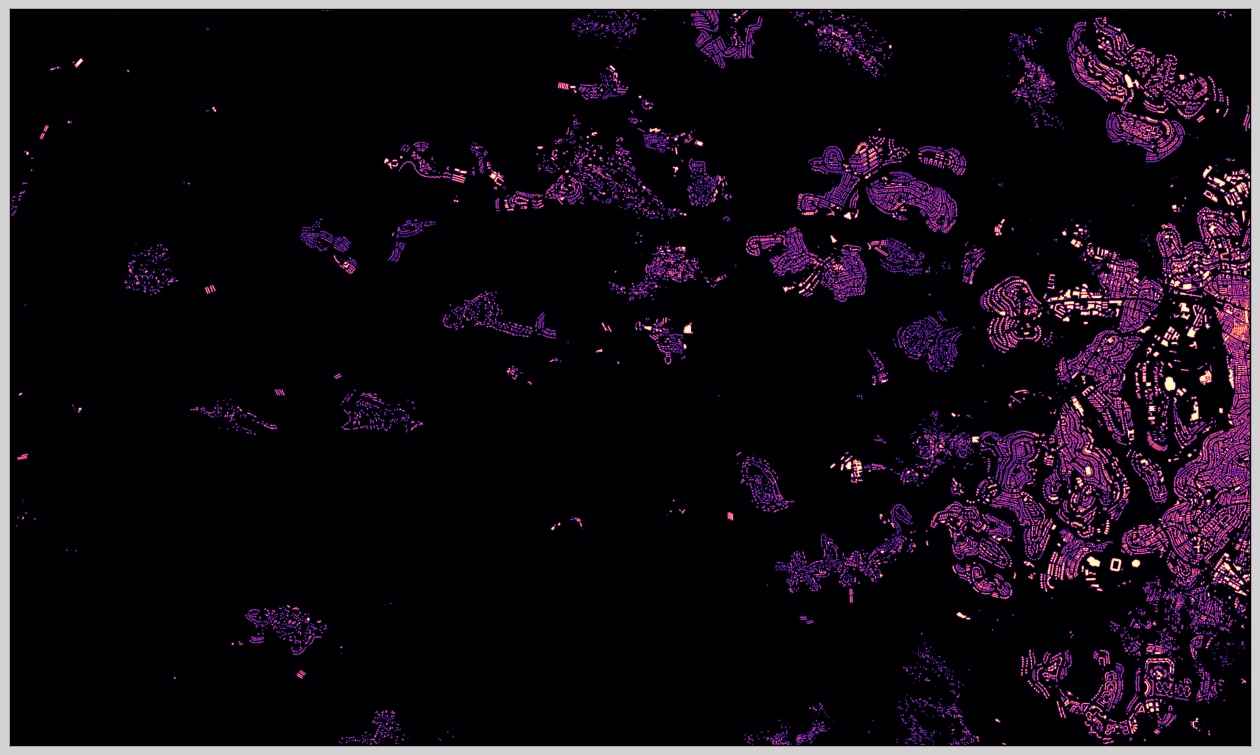

In [ ]:
# Lets see what the building labels looks like!
# remember that the value of the labels reflects the percentage of building coverage in the given pixel.
# That means the values of the labels go from [0, 100] inclusive. The brighter the pixel, the more of it
# is covered by structures.
fig, ax1 = custom_subplots()
ax1.imshow(example_label[:, :, 0], vmin=0, vmax=100, cmap="magma")
plt.show()
fig.clf()

## Visualising hyperspectral images

Visualising hyperspectral data is not always an easy task. We are used to see images displayed in RGB (Red-Green-Blue) and 8-bit, which typically have values in the range 0-255. To get to this point from the original hyperspectral image (which comes as 16 bit images) we need to select the rights bands and process them before we can display a nice RGB image. Here is one way to do so!

**Note**: *For some optical satellites, RGB bands might not be available*

In [ ]:
# Rendering hyperspectral images as RGB can be troublesome. Here is a methodology
# Lets define it as a function so we can reuse it later.

# Clip the top and bottom 2% of the data to not normalise to outliers.
def clip_to_quantiles(arr, q_min=0.02, q_max=0.98):
    return np.clip(arr,
        np.nanquantile(arr, q_min),
        np.nanquantile(arr, q_max),
    )

def render_s2_as_rgb(arr):
    # If there are nodata values, lets cast them to zero.
    if np.ma.isMaskedArray(arr):
        arr = np.ma.getdata(arr.filled(0))

    # Select only Blue, green, and red.
    rgb_slice = arr[:, :, 0:3]

    # Clip the data to the quantiles, so the RGB render is not stretched to outliers,
    # Which produces dark images.
    for c in [0, 1, 2]:
        rgb_slice[:, :, c] = clip_to_quantiles(rgb_slice[:, :, c])

    # The current slice is uint16, but we want an uint8 RGB render.
    # We normalise the layer by dividing with the maximum value in the image.
    # Then we multiply it by 255 (the max of uint8) to be in the normal RGB range.
    for c in [0, 1, 2]:
        rgb_slice[:, :, c] = (rgb_slice[:, :, c] / rgb_slice[:, :, c].max()) * 255.0

    # We then round to the nearest integer and cast it to uint8.
    rgb_slice = np.rint(rgb_slice).astype(np.uint8)

    return rgb_slice

In [ ]:
# Lets take it for a spin.
fig, ax1 = custom_subplots()
ax1.imshow(render_s2_as_rgb(example_s2_RGB))
plt.show()
fig.clf()

This cell output is too large and can only be displayed while logged in.


## Visualising SAR data

The sentinel 1 data has two polarisations, Vertical Vertical and Vertical Horizontal. A common way of visualising SAR imagery as RGB is to do the following: `Blue: VV, Green: VH, Red: VV/VH` but for now, lets just view
one of the polarisations (VV).

In [ ]:
# The sentinel 1 data has two polarisations, Vertical Vertical and Vertical Horisontal.
# Here we only visualise the VV component.
fig, ax1 = custom_subplots()
ax1.imshow(example_s1[:, :, 0], vmin=-20, vmax=5, cmap="magma")
plt.show()
fig.clf()

This cell output is too large and can only be displayed while logged in.


## Visualising DEM data

The DEM data contains 4 channels that contain information on the elevation profile.

The first 3 channels contain the orientation of the slope and the actual slope itself. Plotting these channels results in an aspect-slope image.
 The 4th channel contains the actual elevation. When plotted this gives us the elevation profile.

In [ ]:
# Aspect-slope image

# The terrain data is already normalised to what is sometimes called the orientation.
# This is the aspect plotted as a 2D circle, and the slope.
fig, ax1 = custom_subplots()

# We normalise the DEM for visualisation to highlight the contrast in the image.
for c in [0, 1, 2]:
    example_dem[:, :, c] = example_dem[:, :, c] / example_dem[:, :, c].max()

ax1.imshow(example_dem[:, :, 0:3])
plt.show()
fig.clf()

This cell output is too large and can only be displayed while logged in.


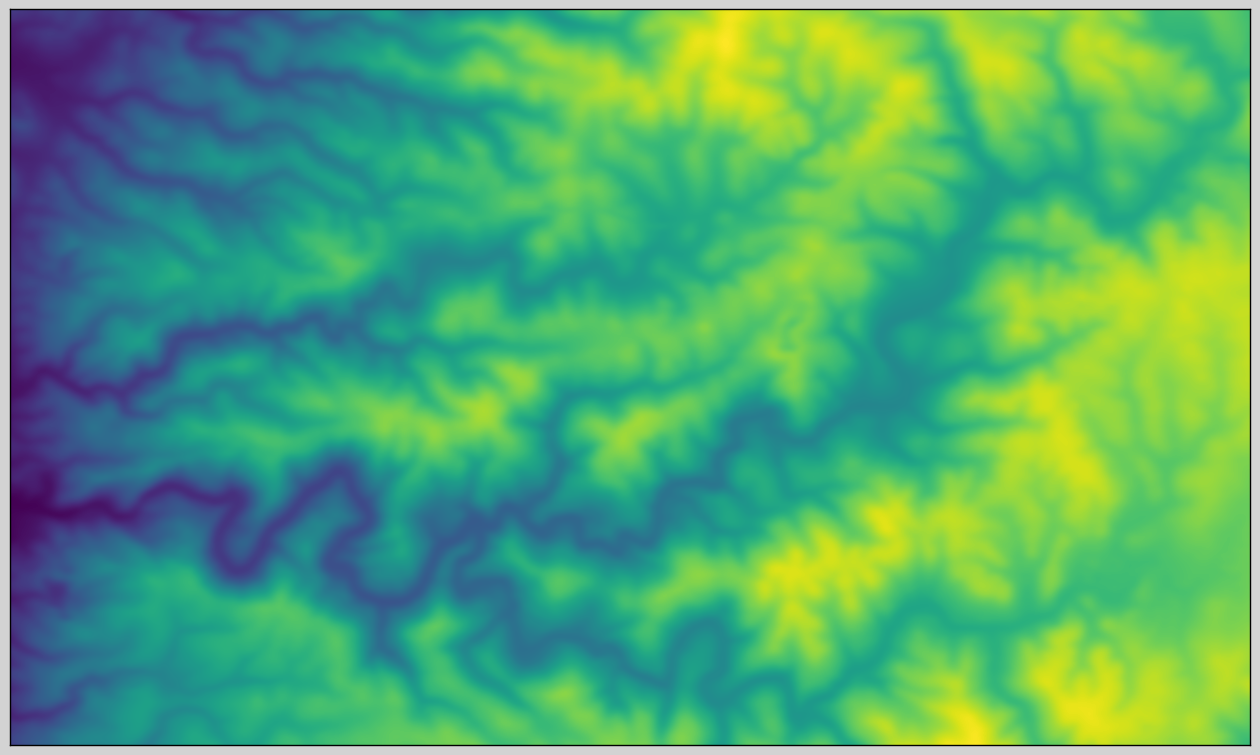

In [ ]:
# Elevation profile

# The elevation values themselves are in the fourth band, normalised to the
# height of mt. everest.
fig, ax1 = custom_subplots()
ax1.imshow(example_dem[:, :, 3] / example_dem[:, :, 3].max(), cmap="viridis")
plt.show()

# Predicting building and proxy population density

Our first task is to analyse the regions and find out which places have the highest density of vulnerable locations and where most of the population is concentrated.

For this task we will train a convolutional neural network on the hyperspectral data from Sentinel-2. For the task of building density prediction we have labels which we can use to train the model and evaluate the results.

## Preparing the data for our convolutional neural network
When working with computer vision tasks, it is often necessary to process large amounts of image data. This can be a challenging task, particularly when working with high-resolution images, which can contain millions of pixels. To make this task more manageable, images are typically divided into smaller sub-regions or patches.

These patches can be generated in a variety of ways, such as by using sliding windows or by randomly selecting regions of the image. We are going to use the buteo library for this. The patches are then typically grouped into batches, which are fed into the deep learning model during training. The major benefit of having patches is to reduce the amount of memory required to process the image data and to make it easier to work with.

It is important to be aware that during the process of creating patches some regions in the original image will be sampled multiple times, if overlaps are used. This means patches are not always independent of each other and might partially overlap. This is especially important to take into account when creating the test set, as it is essential that it is not contaminated with training data.

We can easily create the patches by using the `array_to_patches` function from the buteo library while specifying the size of the resulting arrays.


In [ ]:
# Generate patches for a single image. We can choose the size of the resulting patches. Automatically can create offsets.
patches_label = beo.array_to_patches(example_label, 64)
patches_rgb = beo.array_to_patches(example_s2, 64)

# Patch, height, width, channel.
print(patches_label.shape, patches_rgb.shape)

(540, 64, 64, 1) (540, 64, 64, 9)


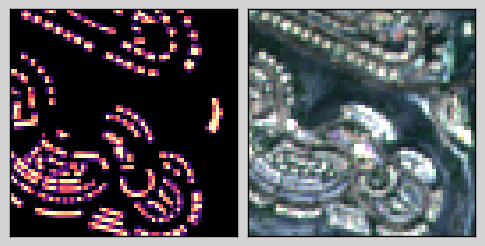

In [ ]:
# We now have 1972 images with height 64 and width 64.
fig, (ax1, ax2) = custom_subplots(nrows=1, ncols=2, size=(6, 6))

# interpolation is set explicit to nearest, smart smoothing at pixel level does not make sense.
ax1.imshow(patches_label[400, :, :, 0], cmap="magma", interpolation="nearest")
ax2.imshow(render_s2_as_rgb(patches_rgb[400, :, :, :]), interpolation="nearest")
plt.show()

## Create train and test set

A machine learning model needs to be trained on a set of data to learn from it. However, to choose the best model or tune hyperparameters, we need a way to evaluate the model's performance on data it has not seen before. By splitting data into separate train and test sets, we can select the best model and hyperparameters. We will set aside 10% of the data to use for testing.

To make sure the test set is completely independent from the train set, we will split the data **before** making the patches.

The best practice in machine learning tasks is to have a validation set as well. The model is not trained on the validation set, is used to evaluate the performance of a model during training. The validation set can be used to avoid overfitting, which happens when a model fits too closely to the training data and performs poorly on new data.


*No validation set is provided, it is left as an exercise to the reader to implement this*

In [ ]:
# Now lets create all the data we need to train our model!
from glob import glob
from tqdm import tqdm

# Lets randomly select 10% of our data to hold out and use for testing.
# It is important that we do it at this level instead of the patch level.
# Since we are using "overlaps", doing the test selection at the patch level,
# would result in contamination as the same pixel can appear in both train
# and test.

# Set the seeds, to make it replicatable,
np.random.seed(SEED)

test_indices = np.random.choice(78, 78 // 10)

# For this version of the model, we will use patch size 32x32 to reduce the
# amount of ram required to run the model. Please feel free to explore the impact
# of using different sizes.
PATCH_SIZE = 32

# With zero offsets, every pixel in the training data would only be sampled once.
# by setting overlaps, we can sample pixel multiple times but in different places
# in the patches.
N_OFFSETS = 3 # ((0, 0), (8, 8), (16, 16), (24, 24))

# Lists to hold our patches
training_label = []
training_s1 = []
training_s2 = []
training_dem = []

testing_label = []
testing_s1 = []
testing_s2 = []
testing_dem = []

paths_labels = sorted(glob(os.path.join(temp_folder, "label_*.tif")))
paths_s1 = sorted(glob(os.path.join(temp_folder, "s1_*.tif")))
paths_s2 = sorted(glob(os.path.join(temp_folder, "s2_*.tif")))
paths_dem = sorted(glob(os.path.join(temp_folder, "dem_*.tif")))

# Read and order the tiles in the temporary folder.
for image in tqdm(zip(
    paths_labels,
    paths_s1,
    paths_s2,
    paths_dem
), total=len(paths_labels), ncols=120):
    path_label, path_s1, path_s2, path_dem = image

    # Get the name and number of the patches
    label_name = os.path.splitext(os.path.basename(path_label))[0]
    img_idx = int(label_name.split("_")[1])

    # Get the data from the tiles
    arr_label = beo.raster_to_array(path_label, filled=True, fill_value=0.0)

    # Handle any potential errors
    np.clip(arr_label, 0.0, 100.0, out=arr_label)
    arr_label[np.isnan(arr_label)] = 0.0

    # Read the tiles
    arr_s1 = beo.raster_to_array(path_s1, filled=True, fill_value=0.0)
    arr_s2 = beo.raster_to_array(path_s2, filled=True, fill_value=0.0)
    arr_dem = beo.raster_to_array(path_dem, filled=True, fill_value=0.0)

    # Generated the patches
    patches_label = beo.array_to_patches(arr_label, PATCH_SIZE, n_offsets=N_OFFSETS)
    patches_s1 = beo.array_to_patches(arr_s1, PATCH_SIZE, n_offsets=N_OFFSETS)
    patches_s2 = beo.array_to_patches(arr_s2, PATCH_SIZE, n_offsets=N_OFFSETS)
    patches_dem = beo.array_to_patches(arr_dem, PATCH_SIZE, n_offsets=N_OFFSETS)

    # Sanity check to ensure that the right images were chosen.
    assert patches_label.shape[0:3] == patches_s1.shape[0:3] == patches_s2.shape[0:3] == patches_dem.shape[0:3], "Patches do not align."

    if img_idx in test_indices:
        testing_label.append(patches_label)
        testing_s1.append(patches_s1)
        testing_s2.append(patches_s2)
        testing_dem.append(patches_dem)
    else:
        training_label.append(patches_label)
        training_s1.append(patches_s1)
        training_s2.append(patches_s2)
        training_dem.append(patches_dem)

# Merge the patches back together
training_label = np.concatenate(training_label, axis=0)
training_s1 = np.concatenate(training_s1, axis=0)
training_s2 = np.concatenate(training_s2, axis=0)
training_dem = np.concatenate(training_dem, axis=0)

testing_label = np.concatenate(testing_label, axis=0)
testing_s1 = np.concatenate(testing_s1, axis=0)
testing_s2 = np.concatenate(testing_s2, axis=0)
testing_dem = np.concatenate(testing_dem, axis=0)

print("Training Labels: ", training_label.shape, training_s1.shape, training_s2.shape, training_dem.shape)
print("Test Labels:     ", testing_label.shape, testing_s1.shape, testing_s2.shape, testing_dem.shape)

100%|██████████| 78/78 [00:34<00:00,  2.26it/s]


Training Labels:  (29512, 32, 32, 1) (29512, 32, 32, 2) (29512, 32, 32, 9) (29512, 32, 32, 4)
Test Labels:      (3292, 32, 32, 1) (3292, 32, 32, 2) (3292, 32, 32, 9) (3292, 32, 32, 4)


## Normalisation strategies

Normalization is a common preprocessing step in computer vision tasks, and it refers to the process of rescaling the pixel values of an image to have a common scale. The main reason for normalizing data in computer vision tasks is to reduce the impact of the scale of the input features on the learning process of the model.


**Sentinel-1**: The current data is expressed in dB. The data is first clipped to the range (-5 dB, 35dB). Afterwards each value is normalised to (0,1) by subtracting the mean and dividing by the stardard deviation.

**Sentinel-2**: The Sentinel-2 images are uint16 with values ranging from 0 to 65535 which are called digital numbers (DN). The physical value derived from this is the reflectance defined as DN/10.000. The reflectance is usually between 0-1 but can be higher due to surface or cloud effects.  By convention Sentinel 2 data is clipped to the range (0,10.000). Afterwards it is normalised to (0,1) as well.

**CopDEM**: The channels in the DEM are already normalised. The elevation (4th channel) is normalised with respect to the heighest point on earth which is  mt. Everest. The slope (3rd band) is also normalised with respect to a slope of 90°. The first two bands contain the orientation of the slope. Because the orientation is a cyclical variable (0° = 360°), we need two channels to encode and  normalise this information. This can be done by storing the sine of the orientation in the first band and the cosine in the second band. To keep the range between (0,1) the final result is:

$$ \text{channel 1} = [sin(\text{orientation})+1]/2 $$
$$ \text{channel 2} = [cos(\text{orientation})+1]/2 $$


In [ ]:
# The next step is normalising the data.
# By convention Sentinel 2 data is normalised by dividing with 10000.0
# Sentinel 1 is more tricky. The current data is dB, which ranges from ~-35 to 5,
# The DEM is already normalised.

# Scalers also return a dictionary of the stats, so the same scaler can be reused.
s1_train, _statdict = beo.scaler_truncate(training_s1, -35.0, 5.0)
s1_test, _statdict = beo.scaler_truncate(testing_s1, -35.0, 5.0)

s2_train, _statdict = beo.scaler_truncate(training_s2, 0.0, 10000.0)
s2_test, _statdict = beo.scaler_truncate(testing_s2, 0.0, 10000.0)

# If the labels are not already float32, cast them to float32.
labels_train = training_label.astype(np.float32, copy=False)
labels_test = testing_label.astype(np.float32, copy=False)

Let's save all our work to disk as NumPy arrays. That way, at any moment in time, we could reload the data again and use it to train the model. A cool thing to know about saving NumPy arrays is that later on, when loading the data again, the data can be kept on disk, and only necessary bits can be loaded into memory upon access. This can be very useful when dealing with large datasets.

In [ ]:
# Lets save the data to our temporary folder and do some house cleaning.
# This takes about 2 minutes, so go make some coffee!
np.savez_compressed(os.path.join(temp_folder, "train.npz"), x_s1=s1_train, x_s2=s2_train, x_dem=training_dem, y=labels_train)
np.savez_compressed(os.path.join(temp_folder, "test.npz"), x_s1=s1_test, x_s2=s2_test, x_dem=testing_dem, y=labels_test)

# Memory cleaning
del s1_train, s2_train, training_dem, labels_train
del s1_test, s2_test, testing_dem, labels_test

## Model definition

We start by building a very simple convolutional network that can already obtain reasonable results. The model will take as input an image containing the 9 spectral bands from Sentinel-2 (normalised and split up into patches of 32x32). The output will be the building density of the pixel ranging between 0-100. This means we are doing regression task as we are trying to predict specific values.

The architecture is simple. First there is an encoder block where the number of channels is increased to 128. Because of the padding, the resolution of the output channels is unchanged. In the decoder block, there are extra convolutions that bring the number of channels back to a single one that contains the building density.

To help the model we force the values to lie between in the range 0-100 since any other values will never be correct.




In [ ]:
import torch
import torch.nn as nn

# This is a Simple Convolutional Neural Network.
class SimpleConvNet(nn.Module):
    def __init__(self, in_channels, output_min, output_max):
        super(SimpleConvNet, self).__init__()
        self.output_min = output_min
        self.output_max = output_max

        # An encoder without a bottleneck
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128)
        )

        # Simple decoder
        self.decoder = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 1, kernel_size=3, padding=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)

        # Lets help the network
        x = torch.clamp(x, self.output_min, self.output_max)
        return x

This is a very simple model. It does not have a bottleneck, skip connections, attention *layers* or other modern features. Please investigate ways of improving this network. A good place to start would be a bottleneckand and skip connections - Maybe a residual block? Check out InceptionResNet and ConvNext for modern convolutional architectures.

A key benefit of the current model is that it takes up **less than 1mb of space**.

In [ ]:
# Define the model
input_channels = 9 # Sentinel 2 initially.

# Since we know the labels will always be [0.0, 100.0], we can help the network.
model = SimpleConvNet(input_channels, 0.0, 100.0)

# Constants for the model. Please explore adjusting these!
EPOCHS = 10
BATCH_SIZE = 16
LEARNING_RATE = 0.001

It is important to be aware that there are different conventions regarding the data format. More specifically TensorFlow uses the convention of channels last while PyTorch uses channels first. When using libraries with different conventions one must take care to change the format when necessary.

In [ ]:
# Create the dataloader
from torch.utils.data import Dataset, DataLoader

class NumpyDataset(Dataset):
    def __init__(self, x_train, y_train, data_is_channel_last=False):
        if data_is_channel_last:
            x_train = beo.channel_last_to_first(x_train)
            y_train = beo.channel_last_to_first(y_train)v

        self.x_train = torch.from_numpy(x_train).float()
        self.y_train = torch.from_numpy(y_train).float()

    def __len__(self):
        return len(self.x_train)

    def __getitem__(self, index):
        x = self.x_train[index]
        y = self.y_train[index]
        return x, y

In [ ]:
# Load the data
x_train = np.load(os.path.join(temp_folder, "train.npz"))["x_s2"] # Note: Initially we only load the S2 Data.
y_train = np.load(os.path.join(temp_folder, "train.npz"))["y"]

# Ready the data for pytorch
def callback(x, y):
    return (
        torch.from_numpy(x).float(),
        torch.from_numpy(y).float(),
    )

# Create the dataset and DataLoader
dataset = NumpyDataset(x_train, y_train, data_is_channel_last=True)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True, num_workers=16)

## Metrics

In machine learning, a metric is a measure used to evaluate the performance of a model on a given task. Metrics are used to quantify how well a model is performing and to compare the performance of different models. <br><br>

**Regression** <br>
The choice of metric depends on the task at hand. In our case we are trying to predict the density of buildings at every given pixel. A very common metric for regression tasks is the Mean Squared Error (MSE). For a given image the MSE is calculated as follows:

$$MSE = \frac{1}{n} \sum_{i=1}^n (y_{pred,i} - y_{label,i})^2 $$

Where $n$ is the number of pixels in the image, $y_{pred,i}$ is the i-th pixel from the prediction and  $y_{label,i}$ is the i-th pixel from the label. <br>
In a similar fashion there is the Mean Average Error (MAE) and Root Mean Squared Error (RMSE) which are expressed in the same units as the label:
$$MAE = \frac{1}{n} \sum_{i=1}^n |y_{pred,i} - y_{label,i}| $$
<br>
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_{pred,i} - y_{label,i})^2}.$$

<br><br>

**Classification** <br>
One could also cast the problem to a binary classification task. This changes the problem from predicting the building density (ranging from 0-100) to predicting if buildings are present or not (0 or 1). In this case we should recast the labels based on a threshold. For example if the building density is greater than 1, we say buildings are present and the new label is 1, else the new label is 0.

For a binary classification task we can use accuracy as a metric. Accuracy is the percentage of correctly classified examples. For a given image the accuracy would be:

$$ accuracy = \frac{\# \text{correctly classified pixels}}{\# \text{pixels in the image}}$$

<br><br>
*accuracy is a very simple metric for classification problems, can you find more nuanced metrics?*


## Train model

We now train the model while optimising for MSE loss.
Inspect how the training loss behaves during training.

In [ ]:
# Lets train!
import torch.optim as optim

# Our loss function
criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Move model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
for epoch in range(EPOCHS):
    running_loss = 0.0

    # Initialize the progress bar for training
    train_pbar = tqdm(dataloader, total=len(dataloader), ncols=120)

    for i, (inputs, targets) in enumerate(train_pbar):
        # Move inputs and targets to the device (GPU)
        inputs, targets = inputs.to(device), targets.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, targets)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Print statistics
        current_loss = loss.item()

        running_loss += current_loss
        mean_loss = running_loss / (i + 1)

        # Update the training bar
        train_pbar.set_description(f"Epoch: {epoch+1:03d}/{EPOCHS:03d}")
        print_dict = { "loss": f"{mean_loss:4f}" }

        train_pbar.set_postfix(print_dict)

Epoch: 010/010: 100%|██████████████████████████████████████████████| 1845/1845 [00:18<00:00, 100.45it/s, loss=98.270058]


In [ ]:
# Save the model in case you want to reuse it.
torch.save(model.state_dict(), os.path.join(FOLDER_PRED, "model_01.pt"))

del dataset, dataloader

# Results & discussion

## Metrics on test set

Metrics are a very important tool to explore model performance. They allow to get a quick summary of the global performance and compare different model architectures, training schemes, data augmentation, etc.

Let's take a look how the trained model performs on the test set for the metrics we defined earlier. We also try to recast the labels to a binary classification problem and see how well it scores in this setup.

In [ ]:
# Lets predict our tests dataset and inspect the results.
# Clear GPU memory
torch.cuda.empty_cache()

with torch.no_grad():
    x_test = beo.channel_last_to_first(np.load(os.path.join(temp_folder, "test.npz"))["x_s2"])
    y_test = beo.channel_last_to_first(np.load(os.path.join(temp_folder, "test.npz"))["y"])
    y_pred = model(torch.from_numpy(x_test).float().to(device)).cpu().detach().numpy()

print("Building density metrics:")
print("\tRMSE:", np.sqrt(np.mean((y_test - y_pred) ** 2)))
print("\tMAE:", np.mean(np.abs(y_test - y_pred)))
print("\tMSE:", np.mean((y_test - y_pred) ** 2))

# Recast problem to classification
threshold = 1 # If 1m^2 of the pixel is covered by buildings, we say that buildings are present
y_test_classification = np.where(y_test > threshold, 1, 0)
y_pred_classification = np.where(y_pred > threshold, 1, 0)

print("\n\nClassification metrics:")
print("\tAccuracy:", 1-np.mean(np.abs(y_test_classification-y_pred_classification)))

Building density metrics:
	RMSE: 21.255932
	MAE: 9.28235
	MSE: 451.81464


Classification metrics:
	Accuracy: 0.8798605639618773


**Be critical about metrics**

Metrics are a very important tool to explore model performance, but they can sometimes be misleading as well.

 Notice for example that the MSE on the training set is much higher than the values during training. It is normal that the test metrics are slightly lower than the metrics during training as this is new data the model has never seen before. The steep increase in MSE however should be investigated. A validation set in the case would have been very helpful to see how the model behaves on new data during the training phase. In this case the sharp increase in MSE is probably because MSE is very sensitive to outliers and a few very bad predictions can have a drastic impact on the final number. Let's plot the distribution ot the squared error to get a better idea of what is happening.

Sometimes models find clever ways to optimise the training metric without actually learning the desired properties. An example of this can be in unbalanced datasets. In our dataset for example there will always be much more pixels not containing any building than the other way around. If the model would optimise accuracy it could get very good accuracy by lazily predicting that no pixels contain buildings!

Let's dig a bit deeper into these metrics and see how they compare to simple baseline predictions.

Metric for baseline model that always predicts 0
	RMSE: 31.531410582045503
	MAE: 13.521410851808746
	MSE: 994.2298532935312
	accuracy: 0.7431005800045565


Metric for baseline model that always predicts the mean of the train labels (3.38m^2).
	RMSE: 30.235753568408338
	MAE: 15.186634218291733
	MSE: 914.2007938495175
	accuracy: 0.2568994199954435


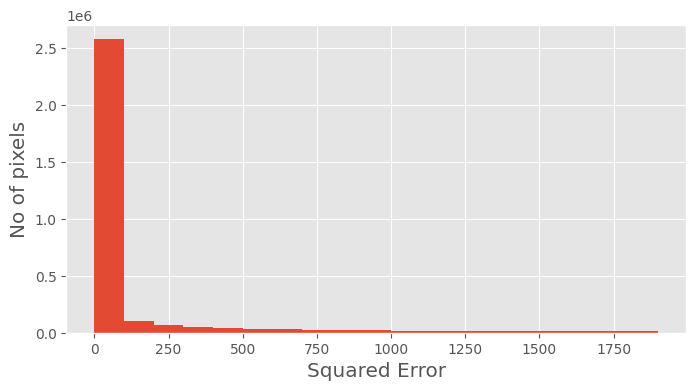

In [ ]:
# Distribution of the SE loss
SE = (y_test - y_pred) ** 2
plt.figure(figsize=(8,4))
_,_,_ = plt.hist(SE.flatten(), bins=[100*i for i in range(20)])
plt.ylabel('No of pixels', size='x-large')
plt.xlabel('Squared Error', size= 'x-large')

# Some very simple baselines to compare the model too
baseline_pred_0 = np.zeros(y_pred.shape)
baseline_pred_1 = np.ones(y_pred.shape)
baseline_pred_mean = np.ones(y_pred.shape)*np.mean(y_train)

print("Metric for baseline model that always predicts 0")
print("\tRMSE:", np.sqrt(np.mean((y_test - baseline_pred_0) ** 2)))
print("\tMAE:", np.mean(np.abs(y_test - baseline_pred_0)))
print("\tMSE:", np.mean((y_test - baseline_pred_0) ** 2))
print("\taccuracy:", 1-np.mean(np.abs(y_test_classification-baseline_pred_0)))

print(f"\n\nMetric for baseline model that always predicts the mean of the train labels ({np.mean(y_train):.2f}m^2).")
print("\tRMSE:", np.sqrt(np.mean((y_test - baseline_pred_mean) ** 2)))
print("\tMAE:", np.mean(np.abs(y_test - baseline_pred_mean)))
print("\tMSE:", np.mean((y_test - baseline_pred_mean) ** 2))
print("\taccuracy:", 1-np.mean(np.abs(y_test_classification-baseline_pred_1)))

**It is therefore important to not blindly rely on metrics but inspect the results visually as well.**

In [ ]:
# You can safely ignore this cell for now

# Callback function to predict array using buteo
# The idea behind this function is to provide a way to go from
# Numpy patches in NHWC -> NCHW -> Tensor -> GPU -> PREDICT -> CPU -> Numpy -> NCHW
# That way we can automatically predict large images without having the write tons
# of code.
def predict(arr):
    swap = beo.channel_last_to_first(arr)
    as_torch = torch.from_numpy(swap).float()
    on_device = as_torch.to(device)
    predicted = model(on_device)
    on_cpu = predicted.cpu()
    as_numpy = on_cpu.numpy()
    swap_back = beo.channel_first_to_last(as_numpy)

    return swap_back

## Inspect predictions on test set

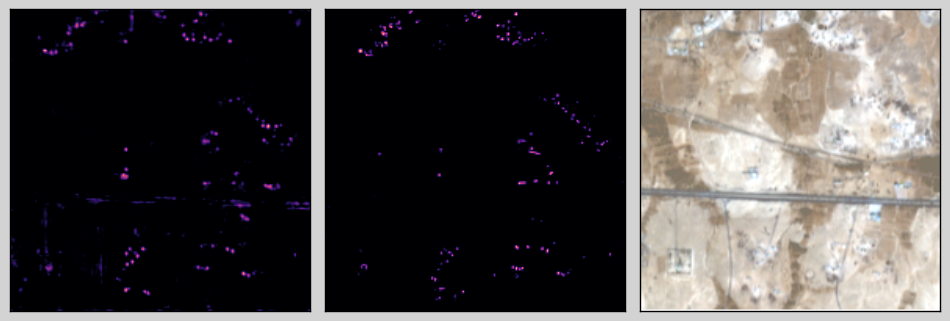

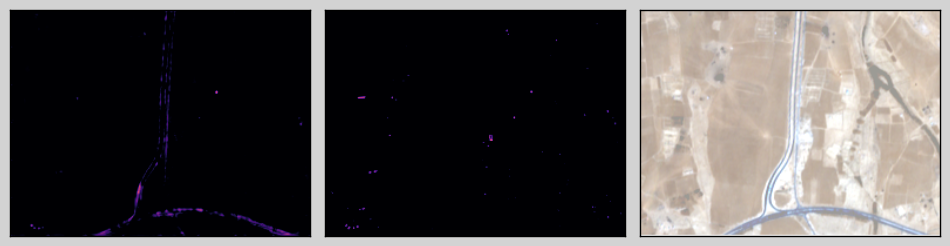

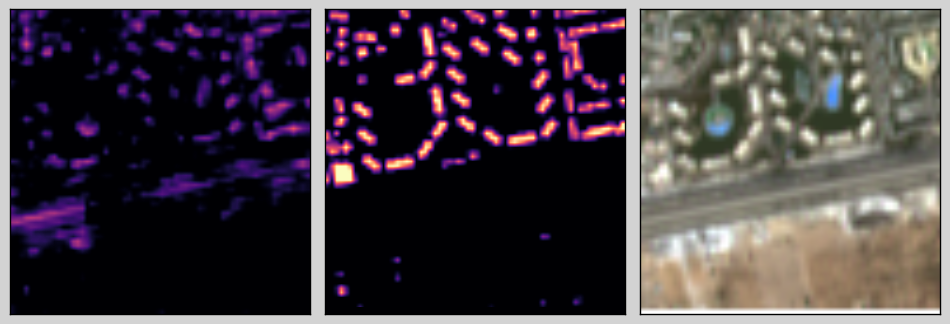

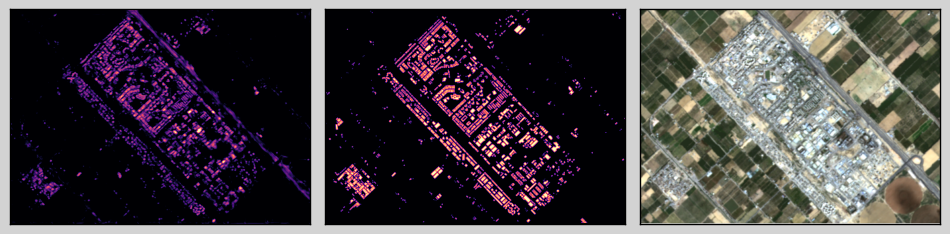

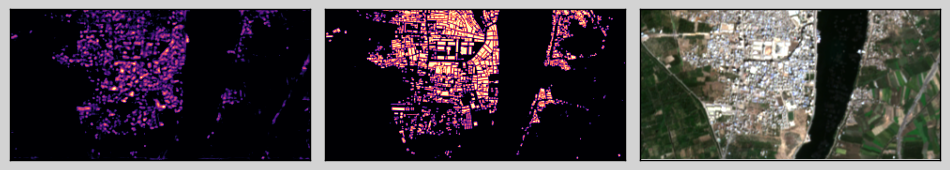

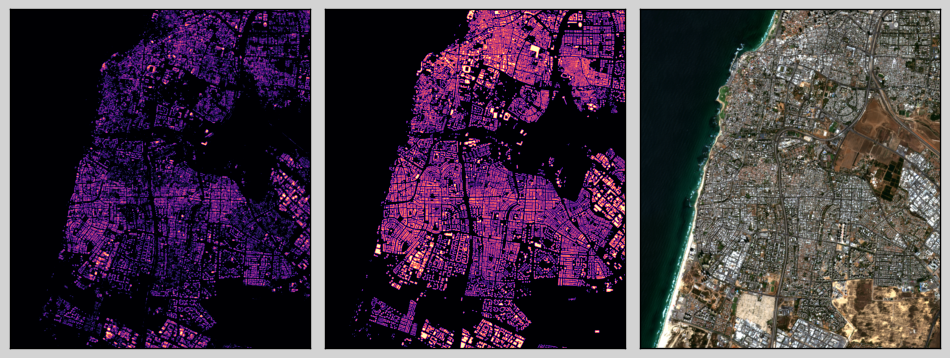

In [ ]:
# Read and order the tiles in the temporary folder.
# predict the images in the test set
for image in zip(
    sorted(glob(os.path.join(temp_folder, "label_*.tif"))),
    sorted(glob(os.path.join(temp_folder, "s1_*.tif"))),
    sorted(glob(os.path.join(temp_folder, "s2_*.tif"))),
    sorted(glob(os.path.join(temp_folder, "dem_*.tif"))),
):
    path_label, path_s1, path_s2, path_dem = image

    label_name = os.path.splitext(os.path.basename(path_label))[0]
    img_idx = int(label_name.split("_")[1])

    # We are only interested in predicting our test dataset.
    if img_idx not in test_indices:
        continue

    # Load the s2 and label data.
    arr_s2 = beo.raster_to_array(path_s2, filled=True, fill_value=0.0)
    arr_label = beo.raster_to_array(path_label, filled=True, fill_value=0.0)

    # Prepare the RGB render as in the previous example
    arr_s2_rgb = beo.raster_to_array(path_s2, filled=True, fill_value=0.0, bands=[3, 2, 1])
    rgb_render = render_s2_as_rgb(arr_s2_rgb)

    # Normalise the S2 data in the same fashion as previously.
    arr_s2, _statdict = beo.scaler_truncate(arr_s2, 0.0, 10000.0)
    arr_s2 = arr_s2.astype(np.float32, copy=False)

    with torch.no_grad():

        try: # Some of our training data might be too small to patch. In that case, ignore them.
            # Predict the image and merge using the median of predictions.
            predicted = beo.predict_array(
                arr_s2,
                predict,
                tile_size=PATCH_SIZE,
                n_offsets=3,
                merge_method="median",
            )

            # Plot the prediction, the label, and the RGB.
            fig, (ax1, ax2, ax3) = custom_subplots(nrows=1, ncols=3, size=(12, 8))
            ax1.imshow(predicted, vmin=0.0, vmax=100.0, cmap="magma")
            ax2.imshow(arr_label, vmin=0.0, vmax=100.0, cmap="magma")
            ax3.imshow(rgb_render)

            plt.show()

        except:
            pass

  # From left to right:
  # prediction, building label, RGB Sentinel 2 Render

## Inspect predictions on all of Alexandria

We can inspect how the model performs when predicting building density on the entire region of Alexandria. This includes regions for which we have no labels (so they were not included in either train or test set).

To avoid a RAM overload, we split the scene in 9 chunks (using `raster_to_array_chunks`) and predict them seperately.

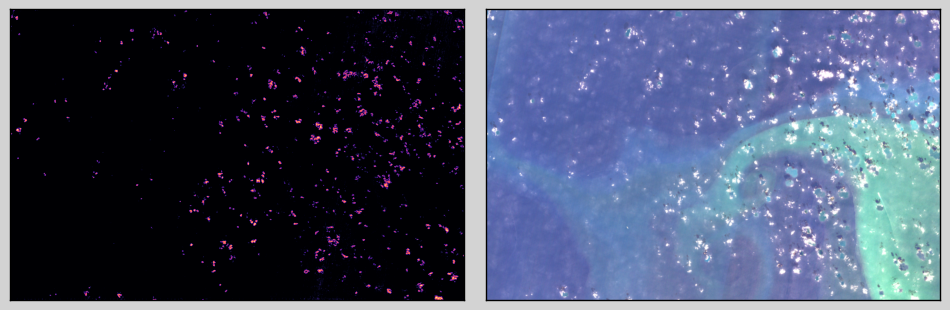

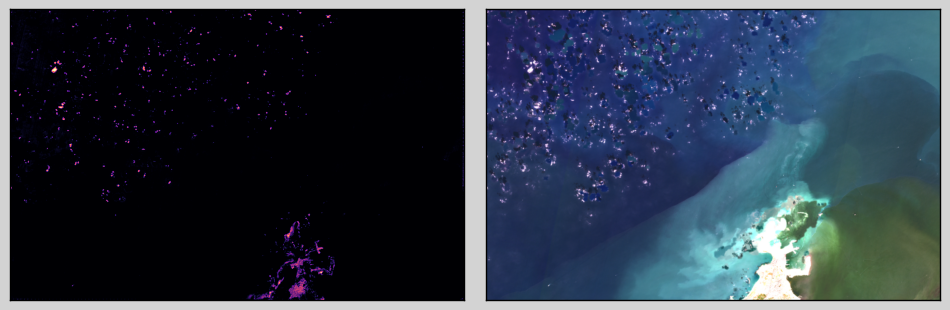

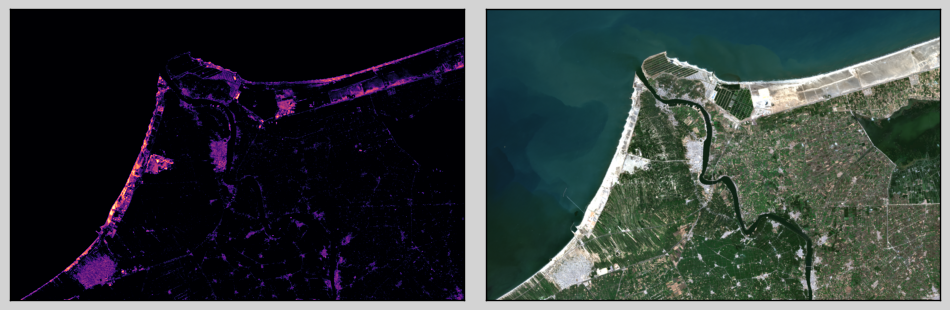

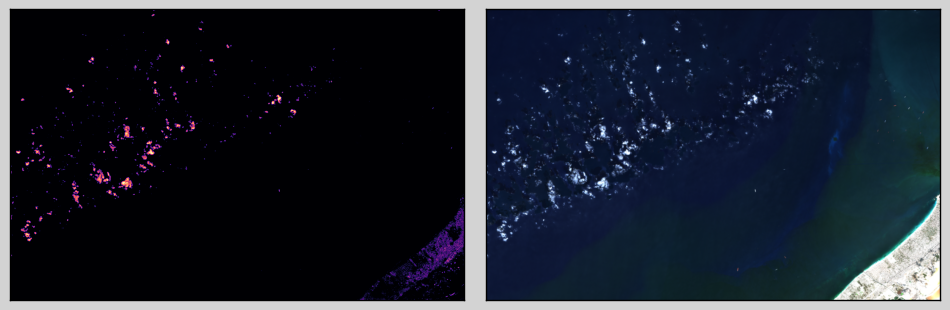

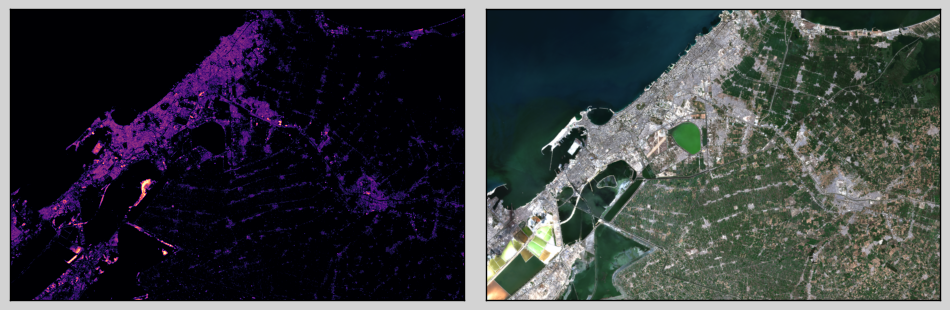

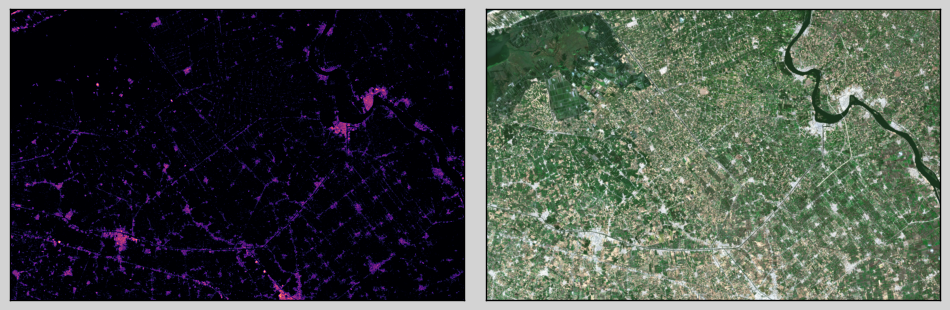

In [ ]:
# Lets predict all of alexandria
# Keeps running out of RAM here -> Reduce the size of alexandria dataset or
# Do the calculation in offsets.
# You could make a mosaic of the final images to create the whole scene again.
path_s2 = os.path.join(FOLDER, "S2.tif")

id = 0
predicted_files = []
for arr, offset in beo.raster_to_array_chunks(path_s2, 9, filled=True, fill_value=0.0, cast=np.float32):

    # Normalise the S2 data in the same fashion as previously.
    arr, _statdict = beo.scaler_truncate(arr, 0.0, 10000.0)

    # When running inference on computer vision models, especially small models like this,
    # it is very common to see noise around the edges of the patches. To alleviate this
    # we can predict multiple overlapping patches and weigh edge pixels less. We can also
    # take a robust score of the predictions like 'MAD', 'Median', or 'Olympian', to create
    # nice smooth predictions, even for very small models.
    with torch.no_grad():
        predicted = beo.predict_array(
            arr,
            predict,
            tile_size=PATCH_SIZE,
            n_offsets=3,
            merge_method="median",
            edge_weighted=True,
        )

    # Render an RGB image for comparison
    rgb = render_s2_as_rgb(arr[:, :, 0:3][:, :, ::-1])

    fig, (ax1, ax2) = custom_subplots(nrows=1, ncols=2, size=(12, 8))
    ax1.imshow(predicted, vmin=0.0, vmax=100.0, cmap="magma")
    ax2.imshow(rgb)
    plt.show()

    # Save the prediction
    out_path = beo.array_to_raster(
        predicted,
        reference=path_s2,
        out_path=os.path.join(FOLDER_PRED, f"prediction_{id}.tif"),
        pixel_offsets=offset,
    )

    id += 1
    predicted_files.append(out_path)

# From left to right:
# prediction, RGB Sentinel 2 Render

## Reflections and exercises.
* The model used was very simple and had some key limitations. Can you identify what they were? Can you imagine and/or design a better architecture that would outperform the simple model?
* More data is available to run the model, than  what was used. How would you update the model to include SAR and possibly terrain data into the classification as well? Could multi-modality reduce some of the shortcomings of the S2 approach?
* Is accuracy the best metric for the binary classifications task. What other metrics could you use?
* Where did the simple model do well and where did not do so well? Reflect on the results.
* We only trained for 10 epochs, but the loss seemed to go continue to go down. Should we train more, how can we guide a training better to ensure that we do not overfit? Implement a new training regiment. Hint: Split data into train, validation, and test. `beo.train_val_split` or from sklearn.
* Using the `buteo.array_to_raster` function you can export the predictions an investigate them in QGIS. It is very important to visually inspect your results and not rely on metrics alone, which can skew your thinking and optimization approaches.

In [ ]:
# Downloading a file to inspect in QGIS or other GIS software.
from google.colab import files

files.download(predicted_files[5])

<a name="references"></a>
# References

* The human cost of disasters: an overview of the last 20 years: https://www.undrr.org/publication/human-cost-disasters-overview-last-20-years-2000-2019
* Bentivoglio, R., Isufi, E., Jonkman, S. N., and Taormina, R.: Deep learning methods for flood mapping: a review of existing applications and future research directions, Hydrol. Earth Syst. Sci., 26, 4345–4378, https://doi.org/10.5194/hess-26-4345-2022, 2022
* Sentinel-1 data products, https://sentinels.copernicus.eu/web/sentinel/missions/sentinel-1/data-products
* Sentinel-2 data products, https://sentinels.copernicus.eu/web/sentinel/missions/sentinel-2/data-products
* COP-DEM, https://spacedata.copernicus.eu/collections/copernicus-digital-elevation-model




# Submitting the Tutorial
*(Please remove this section from your final tutorial submission.)*

If you are using Google Colab, make sure to change the permissions by clicking "Share" (upper right corner of the notebook) >> Change permissions to "Anyone on the internet with this link can comment".

For additional questions, please feel free to contact:
*   climatechangeai.neurips2022@gmail.com
*   tutorials@climatechange.ai